# Baltimor Salary Prediction

To-Do : Dataset which captures the salary from July 1st, 2013 through June 30th, 2014. It includes only those employees who are employed on June 30, 2014. Predict the salary of Employees working in Baltimore

* Libraries

In [119]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error
 

* Importing Dataset

In [120]:
df=pd.read_csv('https://data.baltimorecity.gov/datasets/baltimore::baltimore-city-employee-salaries.csv')

# Data Exploration


In [121]:
df.head()

,lastName,middleInitial,firstName,jobClass,agencyName,agencyID,annualSalary,grossPay,hireDate,fiscalYear,ObjectId
0,Aaron,D,Kareem,UTILITIES INST REPAIR II,Public Works - Water & Waste Water,A50,34115.0,44557.99,2018-08-27,FY2021,1
1,Aaron,R,Lynda,ELECTION JUDGES REGULAR,D01,D01,0.0,185.00,2020-12-08,FY2021,2
2,Aaron,G,Patricia,FACILITIES/OFFICE SERVICES II,Mayor's Office of Employment Development,A03,63457.0,29461.96,1979-10-24,FY2021,3
3,Abadir,O,Adam,OPERATIONS OFFICER II,Health Department,A65,74299.0,85450.35,2016-12-12,FY2021,4
4,Abaku,O,Aigbolosimuan,POLICE OFFICER EID,Police Department,A99,68226.0,102775.97,2018-04-17,FY2021,5


* Getting column names

In [122]:
df.columns

Index(['lastName', 'middleInitial', 'firstName', 'jobClass', 'agencyName',
       'agencyID', 'annualSalary', 'grossPay', 'hireDate', 'fiscalYear',
       'ObjectId'],
      dtype='object')

* Checking the dypes

In [123]:
df.dtypes

lastName          object
middleInitial     object
firstName         object
jobClass          object
agencyName        object
agencyID          object
annualSalary     float64
grossPay         float64
hireDate          object
fiscalYear        object
ObjectId           int64
dtype: object

* Getting basic information

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154187 entries, 0 to 154186
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   lastName       153777 non-null  object 
 1   middleInitial  121195 non-null  object 
 2   firstName      154187 non-null  object 
 3   jobClass       154003 non-null  object 
 4   agencyName     154187 non-null  object 
 5   agencyID       154187 non-null  object 
 6   annualSalary   154187 non-null  float64
 7   grossPay       154187 non-null  float64
 8   hireDate       154185 non-null  object 
 9   fiscalYear     154187 non-null  object 
 10  ObjectId       154187 non-null  int64  
dtypes: float64(2), int64(1), object(8)
memory usage: 12.9+ MB


* Counting the number of datapoints in each column

In [125]:
df.count()

lastName         153777
middleInitial    121195
firstName        154187
jobClass         154003
agencyName       154187
agencyID         154187
annualSalary     154187
grossPay         154187
hireDate         154185
fiscalYear       154187
ObjectId         154187
dtype: int64

* Getting the statistical information

In [126]:
df.describe()

,annualSalary,grossPay,ObjectId
count,154187.000000,154187.000000,154187.000000
mean,52873.341579,55266.226727,77094.000000
std,25066.781786,33516.800966,44510.097315
min,0.000000,1.710000,1.000000
25%,34518.000000,33404.750000,38547.500000
50%,50238.000000,52070.440000,77094.000000
75%,68487.000000,74476.905000,115640.500000
max,276375.000000,373111.190000,154187.000000


* Checking the shape

In [127]:
df.shape

(154187, 11)

In [128]:
df.tail()

,lastName,middleInitial,firstName,jobClass,agencyName,agencyID,annualSalary,grossPay,hireDate,fiscalYear,ObjectId
154182,NaN,9,BPD,BPD,Police Department,A99,65499.0,64127.83,1970-01-01,FY2011,154183
154183,NaN,0,BPD,BPD,Police Department,A99,63384.0,66187.45,1970-01-01,FY2011,154184
154184,NaN,1,BPD,BPD,Police Department,A99,61102.0,71989.51,1970-01-01,FY2011,154185
154185,NaN,2,BPD,BPD,Police Department,A99,59958.0,53235.59,1970-01-01,FY2011,154186
154186,NaN,3,BPD,BPD,Police Department,A99,68523.0,95152.89,1970-01-01,FY2011,154187


* Creating the copy of the dataframe

In [129]:
newdf=df.copy()

* Modifying the column names to the lowercase

In [130]:
newdf.columns=newdf.columns.str.strip().str.lower()

In [131]:
newdf.head()

,lastname,middleinitial,firstname,jobclass,agencyname,agencyid,annualsalary,grosspay,hiredate,fiscalyear,objectid
0,Aaron,D,Kareem,UTILITIES INST REPAIR II,Public Works - Water & Waste Water,A50,34115.0,44557.99,2018-08-27,FY2021,1
1,Aaron,R,Lynda,ELECTION JUDGES REGULAR,D01,D01,0.0,185.00,2020-12-08,FY2021,2
2,Aaron,G,Patricia,FACILITIES/OFFICE SERVICES II,Mayor's Office of Employment Development,A03,63457.0,29461.96,1979-10-24,FY2021,3
3,Abadir,O,Adam,OPERATIONS OFFICER II,Health Department,A65,74299.0,85450.35,2016-12-12,FY2021,4
4,Abaku,O,Aigbolosimuan,POLICE OFFICER EID,Police Department,A99,68226.0,102775.97,2018-04-17,FY2021,5


* Checking the number of null values

In [132]:
newdf.isnull().sum()

lastname           410
middleinitial    32992
firstname            0
jobclass           184
agencyname           0
agencyid             0
annualsalary         0
grosspay             0
hiredate             2
fiscalyear           0
objectid             0
dtype: int64

* Dropping the grosspay column

In [133]:
newdf.drop('grosspay',axis=1,inplace=True)

In [134]:
newdf.columns

Index(['lastname', 'middleinitial', 'firstname', 'jobclass', 'agencyname',
       'agencyid', 'annualsalary', 'hiredate', 'fiscalyear', 'objectid'],
      dtype='object')

* Duplicated of the Agency Id

In [135]:
newdf.agencyid.value_counts()

A99    34706
A64    18374
A50    16353
A65     9640
A49     7007
       ...  
A28        3
P65        3
A53        2
U01        1
A9         1
Name: agencyid, Length: 71, dtype: int64

* Getting the Agencynames associated with the agencyid

In [136]:
newdf.agencyid.value_counts().map(newdf.agencyname)

A99                   State's Attorney's Office
A64                                         D01
A50                           Health Department
A65                                       MOCFS
A49                             Fire Department
                         ...                   
A28                           Health Department
P65                           Health Department
A53    Mayor's Office of Employment Development
U01                                         D01
A9                                          D01
Name: agencyid, Length: 71, dtype: object

* Calculating the count of each job

In [137]:
newdf.jobclass.value_counts()

POLICE OFFICER                    18958
CROSSING GUARD                     3546
LABORER (HOURLY)                   3388
EMT FIREFIGHTER SUPPRESSION        2876
COMMUNITY AIDE                     2865
                                  ...  
QUALITY ASSURANCE ANALYST SUPE        1
FIRE LT. INVES & PRE SERV, ALS        1
CUSTOMER CARE ANALYST SUP II          1
SPECIAL ASSIST. TO THE STATE'S        1
COURT REPORTER                        1
Name: jobclass, Length: 1897, dtype: int64

* Getting the annualsalary counts in desc

In [138]:
newdf.annualsalary.value_counts()

0.0        1958
20800.0    1447
24960.0    1212
22880.0    1030
15080.0     847
           ... 
89126.0       1
84708.0       1
82895.0       1
58337.0       1
48006.0       1
Name: annualsalary, Length: 13321, dtype: int64

* Converting the dtype of the annualsalary column

In [139]:
newdf.annualsalary.astype(int)

0         34115
1             0
2         63457
3         74299
4         68226
          ...  
154182    65499
154183    63384
154184    61102
154185    59958
154186    68523
Name: annualsalary, Length: 154187, dtype: int32

In [140]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154187 entries, 0 to 154186
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   lastname       153777 non-null  object 
 1   middleinitial  121195 non-null  object 
 2   firstname      154187 non-null  object 
 3   jobclass       154003 non-null  object 
 4   agencyname     154187 non-null  object 
 5   agencyid       154187 non-null  object 
 6   annualsalary   154187 non-null  float64
 7   hiredate       154185 non-null  object 
 8   fiscalyear     154187 non-null  object 
 9   objectid       154187 non-null  int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 11.8+ MB


* Cleaning the hiredate column

In [141]:
newdf.head()

,lastname,middleinitial,firstname,jobclass,agencyname,agencyid,annualsalary,hiredate,fiscalyear,objectid
0,Aaron,D,Kareem,UTILITIES INST REPAIR II,Public Works - Water & Waste Water,A50,34115.0,2018-08-27,FY2021,1
1,Aaron,R,Lynda,ELECTION JUDGES REGULAR,D01,D01,0.0,2020-12-08,FY2021,2
2,Aaron,G,Patricia,FACILITIES/OFFICE SERVICES II,Mayor's Office of Employment Development,A03,63457.0,1979-10-24,FY2021,3
3,Abadir,O,Adam,OPERATIONS OFFICER II,Health Department,A65,74299.0,2016-12-12,FY2021,4
4,Abaku,O,Aigbolosimuan,POLICE OFFICER EID,Police Department,A99,68226.0,2018-04-17,FY2021,5


In [142]:
newdf.hiredate[0]

'2018-08-27'

* Cleaning Date

In [143]:
date_clean=re.sub("^\d{4}.*-","",newdf.hiredate[0])
date_clean

'27'

* Cleaning month

In [191]:
month_clean=re.sub("^\d{4}-|-\d{2}","",newdf.hiredate[10])
month_clean

'07'

* Cleaning Year

In [145]:
year_clean=re.sub("-\d{2}.*","",newdf.hiredate[154185])
year_clean

'1970'

In [146]:
newdf.shape[0]

154187

* Making a temp df

In [147]:
newdff=newdf.copy()

In [148]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154187 entries, 0 to 154186
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   lastname       153777 non-null  object 
 1   middleinitial  121195 non-null  object 
 2   firstname      154187 non-null  object 
 3   jobclass       154003 non-null  object 
 4   agencyname     154187 non-null  object 
 5   agencyid       154187 non-null  object 
 6   annualsalary   154187 non-null  float64
 7   hiredate       154185 non-null  object 
 8   fiscalyear     154187 non-null  object 
 9   objectid       154187 non-null  int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 11.8+ MB


In [149]:
newdf['hireyear']=0

In [150]:
newdf.head()

,lastname,middleinitial,firstname,jobclass,agencyname,agencyid,annualsalary,hiredate,fiscalyear,objectid,hireyear
0,Aaron,D,Kareem,UTILITIES INST REPAIR II,Public Works - Water & Waste Water,A50,34115.0,2018-08-27,FY2021,1,0
1,Aaron,R,Lynda,ELECTION JUDGES REGULAR,D01,D01,0.0,2020-12-08,FY2021,2,0
2,Aaron,G,Patricia,FACILITIES/OFFICE SERVICES II,Mayor's Office of Employment Development,A03,63457.0,1979-10-24,FY2021,3,0
3,Abadir,O,Adam,OPERATIONS OFFICER II,Health Department,A65,74299.0,2016-12-12,FY2021,4,0
4,Abaku,O,Aigbolosimuan,POLICE OFFICER EID,Police Department,A99,68226.0,2018-04-17,FY2021,5,0


* Created the new column with the hire year

In [172]:
def clean_year_fun(data):
    clean_year=re.sub("-\d{2}.*","",str(data))
    return clean_year
newdf.hireyear=newdf.hiredate.apply(clean_year_fun)

* Adding the hiremonth column

In [185]:
newdf['hiremonth']=0

* Adding the cleaned month data to the column

In [192]:
def clean_month_fun(data):
    clean_month=re.sub("^\d{4}-|-\d{2}","",str(data))
    return clean_month
newdf.hiremonth=newdf.hiredate.apply(clean_month_fun)

In [193]:
newdf.head()

,lastname,middleinitial,firstname,jobclass,agencyname,agencyid,annualsalary,hiredate,fiscalyear,objectid,hireyear,hiremonth
0,Aaron,D,Kareem,UTILITIES INST REPAIR II,Public Works - Water & Waste Water,A50,34115.0,2018-08-27,FY2021,1,2018,08
1,Aaron,R,Lynda,ELECTION JUDGES REGULAR,D01,D01,0.0,2020-12-08,FY2021,2,2020,12
2,Aaron,G,Patricia,FACILITIES/OFFICE SERVICES II,Mayor's Office of Employment Development,A03,63457.0,1979-10-24,FY2021,3,1979,10
3,Abadir,O,Adam,OPERATIONS OFFICER II,Health Department,A65,74299.0,2016-12-12,FY2021,4,2016,12
4,Abaku,O,Aigbolosimuan,POLICE OFFICER EID,Police Department,A99,68226.0,2018-04-17,FY2021,5,2018,04


* Boxplot for the annualsalary 

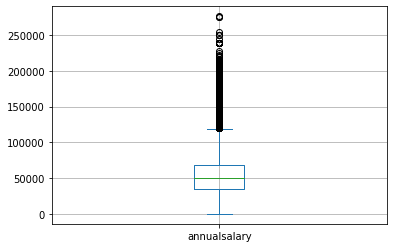

In [152]:
newdf.annualsalary.plot.box()
plt.grid()

In [153]:
newdf.head()

,lastname,middleinitial,firstname,jobclass,agencyname,agencyid,annualsalary,hiredate,fiscalyear,objectid,hireyear
0,Aaron,D,Kareem,UTILITIES INST REPAIR II,Public Works - Water & Waste Water,A50,34115.0,2018-08-27,FY2021,1,0
1,Aaron,R,Lynda,ELECTION JUDGES REGULAR,D01,D01,0.0,2020-12-08,FY2021,2,0
2,Aaron,G,Patricia,FACILITIES/OFFICE SERVICES II,Mayor's Office of Employment Development,A03,63457.0,1979-10-24,FY2021,3,0
3,Abadir,O,Adam,OPERATIONS OFFICER II,Health Department,A65,74299.0,2016-12-12,FY2021,4,0
4,Abaku,O,Aigbolosimuan,POLICE OFFICER EID,Police Department,A99,68226.0,2018-04-17,FY2021,5,0


* Getting the count of each job 

In [154]:
newdf.jobclass.value_counts()[:10]

POLICE OFFICER                 18958
CROSSING GUARD                  3546
LABORER (HOURLY)                3388
EMT FIREFIGHTER SUPPRESSION     2876
COMMUNITY AIDE                  2865
POLICE SERGEANT                 2651
RECREATION ARTS INSTRUCTOR      2215
LABORER                         1958
ELECTION JUDGES REGULAR         1738
ASSISTANT STATE'S ATTORNEY      1679
Name: jobclass, dtype: int64

* Converting the jobs to list

In [155]:
lables=newdf.jobclass.value_counts()[:10].index.tolist()

* Plotting the % of the jobs in pie

<Figure size 3600x3600 with 0 Axes>

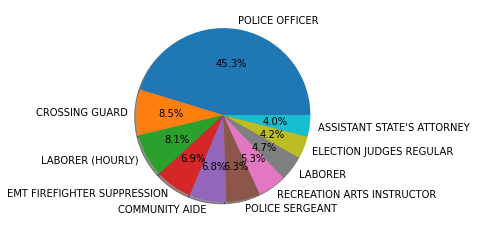

<Figure size 3600x3600 with 0 Axes>

In [156]:
plt.pie(newdf.jobclass.value_counts()[:10],labels=lables,shadow=True,autopct='%1.1f%%')
# plt.legend()
plt.figure(figsize=(50,50))


* Plotting the bar for the number of jobs per job profile

<AxesSubplot:xlabel='jobclass'>

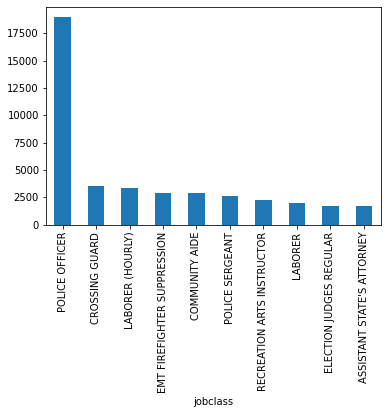

In [157]:
newdf.groupby(['jobclass'])['firstname'].count().sort_values(ascending=False).head(10).plot.bar()

In [158]:
newdf.describe()

,annualsalary,objectid,hireyear
count,154187.000000,154187.000000,154187.0
mean,52873.341579,77094.000000,0.0
std,25066.781786,44510.097315,0.0
min,0.000000,1.000000,0.0
25%,34518.000000,38547.500000,0.0
50%,50238.000000,77094.000000,0.0
75%,68487.000000,115640.500000,0.0
max,276375.000000,154187.000000,0.0


* Getting the highest paid jobs

In [159]:

high_jobs=[]
for i in range(10):
    j=(newdf.annualsalary.sort_values(ascending=False)[:i+1])
    if(i==9):
        high_jobs.append(j)
    # print(j)

In [160]:

high_jobs

[5569      276375.0
 20737     275000.0
 35656     275000.0
 11263     255000.0
 50361     250000.0
 22030     250000.0
 37130     250000.0
 9062      245000.0
 112206    238772.0
 98278     238772.0
 Name: annualsalary, dtype: float64]

In [161]:
newdf.annualsalary.sort_values(ascending=False)[:1]

5569    276375.0
Name: annualsalary, dtype: float64

In [162]:
newdf.head()

,lastname,middleinitial,firstname,jobclass,agencyname,agencyid,annualsalary,hiredate,fiscalyear,objectid,hireyear
0,Aaron,D,Kareem,UTILITIES INST REPAIR II,Public Works - Water & Waste Water,A50,34115.0,2018-08-27,FY2021,1,0
1,Aaron,R,Lynda,ELECTION JUDGES REGULAR,D01,D01,0.0,2020-12-08,FY2021,2,0
2,Aaron,G,Patricia,FACILITIES/OFFICE SERVICES II,Mayor's Office of Employment Development,A03,63457.0,1979-10-24,FY2021,3,0
3,Abadir,O,Adam,OPERATIONS OFFICER II,Health Department,A65,74299.0,2016-12-12,FY2021,4,0
4,Abaku,O,Aigbolosimuan,POLICE OFFICER EID,Police Department,A99,68226.0,2018-04-17,FY2021,5,0


* Converting it into the np array

In [163]:
high_jobs_np=np.array(high_jobs,ndmin=0)

* Changing the 2D array to 1D

In [164]:
high_jobs_np=high_jobs_np.flatten()

In [165]:
high_jobs_np.shape

(10,)

In [166]:
high_jobs_np.reshape(10)

array([276375., 275000., 275000., 255000., 250000., 250000., 250000.,
       245000., 238772., 238772.])

In [167]:
high_jobs_np.ndim

1

* Plotting the pie for the highest paid jobs



<Figure size 3600x3600 with 0 Axes>

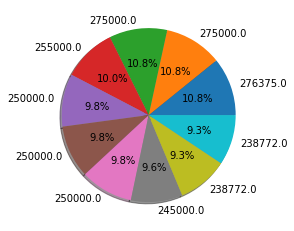

<Figure size 3600x3600 with 0 Axes>

In [168]:
# plt.pie(newdf.annualsalary.sort_values(ascending=False)[:10],labels=high_jobs_np,shadow=True,autopct='%1.1f%%')
plt.pie(high_jobs_np,labels=high_jobs_np,shadow=True,autopct='%1.1f%%')
# plt.legend()
plt.figure(figsize=(50,50))


In [169]:
newdf.head()

,lastname,middleinitial,firstname,jobclass,agencyname,agencyid,annualsalary,hiredate,fiscalyear,objectid,hireyear
0,Aaron,D,Kareem,UTILITIES INST REPAIR II,Public Works - Water & Waste Water,A50,34115.0,2018-08-27,FY2021,1,0
1,Aaron,R,Lynda,ELECTION JUDGES REGULAR,D01,D01,0.0,2020-12-08,FY2021,2,0
2,Aaron,G,Patricia,FACILITIES/OFFICE SERVICES II,Mayor's Office of Employment Development,A03,63457.0,1979-10-24,FY2021,3,0
3,Abadir,O,Adam,OPERATIONS OFFICER II,Health Department,A65,74299.0,2016-12-12,FY2021,4,0
4,Abaku,O,Aigbolosimuan,POLICE OFFICER EID,Police Department,A99,68226.0,2018-04-17,FY2021,5,0


* Plotting the bar for the higest employment provider agency

<AxesSubplot:xlabel='agencyid'>

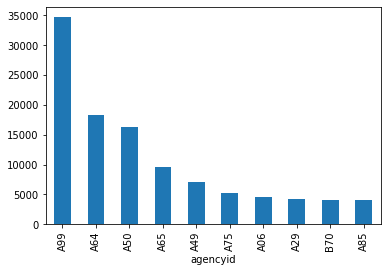

In [170]:
newdf.groupby(['agencyid'])["firstname"].count().sort_values(ascending=False).head(10).plot.bar()

* Plot Salary v/s Year Graph

In [175]:
newdf.head()

,lastname,middleinitial,firstname,jobclass,agencyname,agencyid,annualsalary,hiredate,fiscalyear,objectid,hireyear
0,Aaron,D,Kareem,UTILITIES INST REPAIR II,Public Works - Water & Waste Water,A50,34115.0,2018-08-27,FY2021,1,2018
1,Aaron,R,Lynda,ELECTION JUDGES REGULAR,D01,D01,0.0,2020-12-08,FY2021,2,2020
2,Aaron,G,Patricia,FACILITIES/OFFICE SERVICES II,Mayor's Office of Employment Development,A03,63457.0,1979-10-24,FY2021,3,1979
3,Abadir,O,Adam,OPERATIONS OFFICER II,Health Department,A65,74299.0,2016-12-12,FY2021,4,2016
4,Abaku,O,Aigbolosimuan,POLICE OFFICER EID,Police Department,A99,68226.0,2018-04-17,FY2021,5,2018


Text(0, 0.5, 'Salaries')

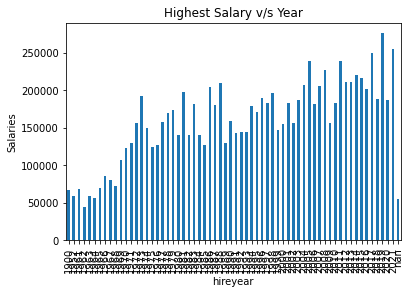

In [183]:
newdf.groupby(['hireyear'])['annualsalary'].max().plot.bar()
# plt.figure(figsize=(4000,4000))
plt.title("Highest Salary v/s Year")
plt.ylabel("Salaries")

* Plot Average Salary v/s Year graph

Text(0, 0.5, 'Salaries')

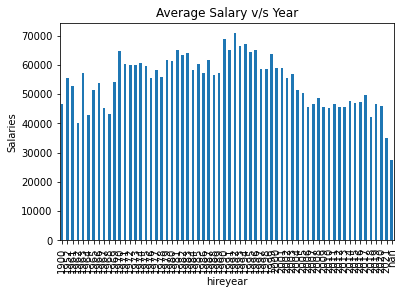

In [184]:
newdf.groupby(['hireyear'])['annualsalary'].mean().plot.bar()
# plt.figure(figsize=(4000,4000))
plt.title("Average Salary v/s Year")
plt.ylabel("Salaries")

* Plot a graph to check on which month most of the people are hired

Text(0, 0.5, 'No. Of people hired')

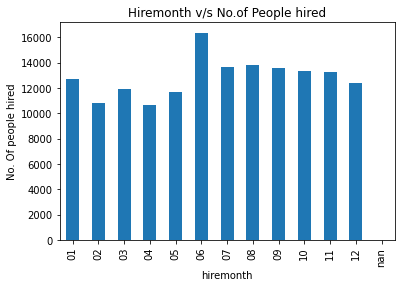

In [194]:
newdf.groupby(['hiremonth'])['firstname'].count().plot.bar()
# plt.figure(figsize=(4000,4000))
plt.title("Hiremonth v/s No.of People hired")
plt.ylabel("No. Of people hired")